In [1]:
# get the data
import helper

X, y = helper.get_data()

In [2]:
spam_count = (y == 1).sum()
ham_count = (y == 0).sum()

spam_count, ham_count

(2640, 2750)

In [3]:
X[0]

'    Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.c

# FASTAI 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

import pandas as pd
train_df = pd.DataFrame(y_train)
train_df['text'] = X_train
valid_df = pd.DataFrame(y_valid)
valid_df['text'] = X_valid

In [26]:
train_df.head()

,0,text
0,True,The Home Based Business of the DECADE\n$10K pl...
1,True,Note: \nThis is NOT SPAM!! This is NOT Unsolic...
2,False,"This sort of thing is, in my (limited?) experi..."
3,False,\nI am delurking to comment on the Salon artic...
4,False,URL: http://www.livejournal.com/talkread.bml?j...


In [27]:
valid_df.head()

,0,text
0,True,IS YOUR BUSINESS MAKING MONEY!\nSet Up To Acce...
1,False,"URL: http://www.newsisfree.com/click/-0,861366..."
2,True,
3,True,\nDegerli SMSTR kullanicimiz\nSMS programimiz ...
4,True,\n Fortunes are literally being made in t...


In [28]:
len(train_df) - train_df.count()

0       0
text    2
dtype: int64

In [29]:
train_df.dropna(axis=0, inplace=True)

In [30]:
len(train_df) - train_df.count()

0       0
text    0
dtype: int64

In [31]:
train_df

,0,text
0,True,The Home Based Business of the DECADE\n$10K pl...
1,True,Note: \nThis is NOT SPAM!! This is NOT Unsolic...
2,False,"This sort of thing is, in my (limited?) experi..."
3,False,\nI am delurking to comment on the Salon artic...
4,False,URL: http://www.livejournal.com/talkread.bml?j...
...,...,...
4307,True,\n HYPERLINK\n HYPERLINK\n HYPERLINK\...
4308,True,\n \n You St=\nill Don't Have A Uni0versi...
4309,True,"Heya,\n\nDo you want a rolex watch?\n\nIn our ..."
4310,True,\n\n\nMRS. VORKE IDAHO\nPLOT 13 VICTORIA GARDE...


In [32]:
len(valid_df) - valid_df.count()

0       0
text    0
dtype: int64

In [33]:
train_df.columns = ['label', 'text']
valid_df.columns = ['label', 'text']

In [34]:
train_df

,label,text
0,True,The Home Based Business of the DECADE\n$10K pl...
1,True,Note: \nThis is NOT SPAM!! This is NOT Unsolic...
2,False,"This sort of thing is, in my (limited?) experi..."
3,False,\nI am delurking to comment on the Salon artic...
4,False,URL: http://www.livejournal.com/talkread.bml?j...
...,...,...
4307,True,\n HYPERLINK\n HYPERLINK\n HYPERLINK\...
4308,True,\n \n You St=\nill Don't Have A Uni0versi...
4309,True,"Heya,\n\nDo you want a rolex watch?\n\nIn our ..."
4310,True,\n\n\nMRS. VORKE IDAHO\nPLOT 13 VICTORIA GARDE...


In [35]:
data_lm = TextDataBunch.from_df('datasets/', train_df=train_df, valid_df=valid_df)

In [36]:
data_lm.save()

In [37]:
data = load_data('datasets/')

In [38]:
# what the tokenizer had done behinde the scene
data = TextClasDataBunch.from_df('datasets/', train_df=train_df, valid_df=test_df)
data.show_batch()

text,target
"xxbos change your settings : http : / / blo.gs / xxunk \n \n here is your list of updated weblogs . \n \n xxmaj oct 04 , 2002 \n \n 3:03am \n love-always.net \n http : / / love-always.net / \n xxmaj michael 's xxmaj cyber xxmaj journal \n http : / / weblog.michaelpark.net / \n xxmaj jesus xxmaj christ \n",False
"xxbos \n "" xxmaj free trade and free markets have proven their ability to lift whole \n societies out of poverty "" \n i 'm not a socio - political / history buff - does anybody have some clear \n examples ? \n \n \n xxrep 5 - xxmaj original xxmaj message xxrep 5 - \n xxmaj from : "" xxmaj rohit xxmaj khare",False
"xxbos > a world where some live in comfort and plenty , while half of the human \n > race lives on less than $ 2 a day , is neither just nor stable . \n \n xxmaj absolutely correct . xxmaj perhaps the most fundamental thing to realize about \n life on xxmaj earth today . \n \n xxmaj the following is a fascinating document",False
"xxbos \n xxmaj sent e - mail message \n \n xxmaj from : enenkio@webtv.net ( xxmaj robert � xxmaj moore ) xxmaj date : xxmaj thu , xxmaj sep 5 , 2002 , xxunk xxmaj to : xxunk xxmaj subject : xxup hawai`i & xxup enenkio xxup kingdoms xxup americans xxup shame ! \n xxmaj sent e - mail message \n xxmaj from : enenkio@webtv.net (",True
"xxbos \n "" 60 xxmaj minutes xxup ii "" xxmaj bush xxmaj interview : \n \n ( xxup cbs ) xxmaj no president since xxmaj abraham xxmaj lincoln has seen such horrific loss of \n life in a war on xxmaj american soil . xxmaj no president since xxmaj james xxmaj madison , nearly \n 200 years ago , has seen the nation ’s capital",False


In [39]:
# Numericalization
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '\n ']

In [40]:
data.train_ds[0][0]

Text xxbos xxmaj the xxmaj home xxmaj based xxmaj business of the xxup decade 
  $ 10 k plus checks in 30 xxunk xxmaj its a xxup fact ! 
  xxmaj join the next xxup big xxmaj internet xxmaj gold xxmaj rush today ! 
  http : / / capitaladvertisers.com / promo.php?from=jaschoff 
  xxrep 64 * 
  xxmaj top xxmaj sponsor xxmaj ad 
  xxrep 64 * 
 
  xxmaj if you spend any time online trying to wade through the molasses of 
  internet hype and promises of riches , no doubt you will have noticed that 
  xxmaj xxunk are the current flavor of the week these days . 
  xxmaj this is a xxmaj new xxmaj launched xxmaj xxunk ( xxmaj sept. 25 , 2004 ) only a week old , 
  with 6 very active members . 
  xxmaj get in early . 
  $ 5.00 xxup payments xxup with xxup no xxup advertising ! 
 
  xxmaj we do the work , you get paid ! 
 
  xxmaj earn xxmaj streams xxmaj of $ 5 
 
  .. xxmaj we xxmaj guarantee xxmaj it ! 
 
  xxmaj our " xxmaj we xxmaj do xxmaj the xxmaj work " xxmaj system xxmaj does xxmaj every

In [41]:
data.train_ds[0][0].data[:10]

array([  2,   5,  13,   5, 184,   5, 352,   5, 145,  19])

In [42]:
bs = 48 # initial value

In [82]:
all_data = train_df.copy()
all_data.append(valid_df)

,label,text
0,True,The Home Based Business of the DECADE\n$10K pl...
1,True,Note: \nThis is NOT SPAM!! This is NOT Unsolic...
2,False,"This sort of thing is, in my (limited?) experi..."
3,False,\nI am delurking to comment on the Salon artic...
4,False,URL: http://www.livejournal.com/talkread.bml?j...
...,...,...
1073,True,O=\nrOder BrRAND\nNArME RFX Prescri0ptizons\nf...
1074,False,Better late than never -- I received a grant f...
1075,True,\nsubsegment founded resided unwisest dactylic...
1076,False,Ray Dermody's [DERMODYR@ITCARLOW.IE] 20 lines ...


In [83]:
all_data.text

0       The Home Based Business of the DECADE\n$10K pl...
1       Note: \nThis is NOT SPAM!! This is NOT Unsolic...
2       This sort of thing is, in my (limited?) experi...
3       \nI am delurking to comment on the Salon artic...
4       URL: http://www.livejournal.com/talkread.bml?j...
                              ...                        
4307    \n    HYPERLINK\n    HYPERLINK\n    HYPERLINK\...
4308    \n   \n    You St=\nill Don't Have A Uni0versi...
4309    Heya,\n\nDo you want a rolex watch?\n\nIn our ...
4310    \n\n\nMRS. VORKE IDAHO\nPLOT 13 VICTORIA GARDE...
4311    people with too much time on their hands..\n\n...
Name: text, Length: 4310, dtype: object

In [84]:
all_data.drop(columns='label', inplace=True); all_data

,text
0,The Home Based Business of the DECADE\n$10K pl...
1,Note: \nThis is NOT SPAM!! This is NOT Unsolic...
2,"This sort of thing is, in my (limited?) experi..."
3,\nI am delurking to comment on the Salon artic...
4,URL: http://www.livejournal.com/talkread.bml?j...
...,...
4307,\n HYPERLINK\n HYPERLINK\n HYPERLINK\...
4308,\n \n You St=\nill Don't Have A Uni0versi...
4309,"Heya,\n\nDo you want a rolex watch?\n\nIn our ..."
4310,\n\n\nMRS. VORKE IDAHO\nPLOT 13 VICTORIA GARDE...


In [85]:
# create lan model using unlabeled data
data_lm = (TextList.from_df(df=all_data)
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch(bs=bs))

In [86]:
data_lm.save('datasets/data_lm.pkl')

In [87]:
data_lm = load_data('datasets/', 'data_lm.pkl', bs=bs)
data_lm.show_batch()

idx,text
0,"? xxmaj if so , go down to the bottom and click on the "" unsubscribe "" link to be removed from this xxup opt - xxup in only list . \n xxrep 60 : \n \n xxmaj dear xxmaj subscriber , xxmaj please take a moment to remove yourself from this list if you feel you are receiving these messages in error , by going down to"
1,"when it appears to error out on me . \n \n debug : xxmaj razor1 is available \n debug : entering helper - app run mode \n debug : xxmaj razor xxmaj agents xxunk , protocol version 2 . \n debug : xxunk seconds before closest server discovery \n debug : xxmaj agent xxunk \n xxmaj problem while trying to load xxmaj razor1 :"
2,"do . \n xxmaj you decide how much money \n you need , as long as it 's a lawful amount and meets with the xxmaj government \n xxmaj agencies criteria , the money is yours to keep and never has to be xxunk . \n xxmaj this money is non taxable & interest free . \n xxmaj none of these programs require \n"
3,"- xxunk \n xxunk \n xxbos i dunno , xxup bb . xxmaj women who like to be thought of this way should have the \n right to choose to be treated this way . xxmaj men too ... ahem . (: xxmaj my boy \n cleans , washes clothes , cooks , fixes stuff , etc , and works the same number \n of"
4,"= xxup a0 xxmaj we \n presents the xxunk selection of xxmaj warez cds at lowest prices ! \n xxmaj we sell xxmaj backup cds , also = \n known as \n xxmaj warez cds . xxmaj backup cds are copies of xxmaj software . xxmaj for example if you go int= \n o a \n shop and buy xxmaj windows xxup xp xxmaj"


In [88]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [89]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


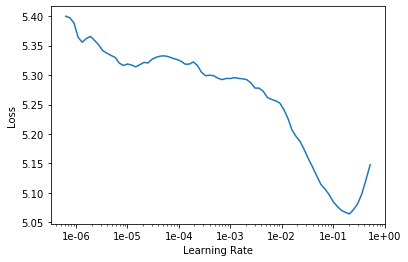

In [90]:
learn.recorder.plot(skip_end=15)

In [91]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.793472,3.431421,0.368604,02:11


In [92]:
learn.save('fit_head')

In [93]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (3879 items)
x: LMTextList
xxbos xxmaj note : 
  xxmaj this is xxup not xxup spam ! ! xxmaj this is xxup not xxmaj unsolicited xxmaj email ! ! xxmaj you are receiving this message because you xxup opted - xxup in to receive certain special offers from one of our xxunk sites . 
 
 
  xxmaj have you changed your mind ? 
 
  xxmaj do you want to xxup stop receiving these special offers ? xxmaj if so , go down to the bottom and click on the " unsubscribe " link to be removed from this xxup opt - xxup in only list . 
  xxrep 60 : 
 
  xxmaj dear xxmaj subscriber , xxmaj please take a moment to remove yourself from this list if you feel you are receiving these messages in error , by going down to the bottom and clicking on the xxunk link below . 
 
 
  xxrep 60 : 
  xxmaj special xxmaj offer $ 2.99 until 08 / 26 / 2202 5:00 pm 
 
 
  1 . xxmaj sexual xxmaj fitness and xxmaj penis xxmaj enlargement xxmaj system 
  xxrep 60 . 
  xxmaj vid

In [94]:
learn.freeze()

In [95]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.373575,3.414573,0.371049,02:06
1,3.320251,3.364953,0.376520,02:06
2,3.259178,3.304470,0.384005,02:07
3,3.160378,3.253329,0.392490,02:07
4,3.072371,3.215902,0.397397,02:07
5,2.993069,3.188961,0.401444,02:07
6,2.953166,3.171827,0.405193,02:07
7,2.870126,3.163136,0.406529,02:08
8,2.867773,3.159529,0.407073,02:08
9,2.866894,3.158549,0.407156,02:08


In [96]:
learn.save('fine_tuned')
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (3879 items)
x: LMTextList
xxbos xxmaj note : 
  xxmaj this is xxup not xxup spam ! ! xxmaj this is xxup not xxmaj unsolicited xxmaj email ! ! xxmaj you are receiving this message because you xxup opted - xxup in to receive certain special offers from one of our xxunk sites . 
 
 
  xxmaj have you changed your mind ? 
 
  xxmaj do you want to xxup stop receiving these special offers ? xxmaj if so , go down to the bottom and click on the " unsubscribe " link to be removed from this xxup opt - xxup in only list . 
  xxrep 60 : 
 
  xxmaj dear xxmaj subscriber , xxmaj please take a moment to remove yourself from this list if you feel you are receiving these messages in error , by going down to the bottom and clicking on the xxunk link below . 
 
 
  xxrep 60 : 
  xxmaj special xxmaj offer $ 2.99 until 08 / 26 / 2202 5:00 pm 
 
 
  1 . xxmaj sexual xxmaj fitness and xxmaj penis xxmaj enlargement xxmaj system 
  xxrep 60 . 
  xxmaj vid

In [97]:
TEXT = "I'm sending this email to ask for a"
N_WORDS = 40
N_SENTENCES = 2

In [98]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I'm sending this email to ask for a new message in the body of the message . It will be only the only message from the message . 
 
  The 
  following message in the message is : 
  Delivery to your office 
 
I'm sending this email to ask for a change of address , to go , " Do you think you 're 
  running it ? " 
  How to 
  tell you what to do ? Yes , it was just a bit of effort


In [105]:
TEXT = "Welcome to our company"
N_WORDS = 40
N_SENTENCES = 2

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Welcome to our company 's Dream Theater Theater system on Tuesday , October 28 , 2004 . The Principal Charge is to offer $ 150 off to a phone call from : $ 50 to $
Welcome to our company 's newest operating system , Operating System . 
 
  It 's 
  the best version of software for Mac OS x , to be used as a default OS . 
  To download


In [106]:
learn.save_encoder('fine_tubed_enc')

# Classifier

In [119]:
data_clas = TextDataBunch.from_df('datasets/', train_df=train_df, valid_df=valid_df, vocab=data_lm.vocab)

In [ ]:
data_clas.save('data_clas.pkl')

In [3]:
bs = 48
data_clas = load_data('datasets/', 'data_clas.pkl', bs=bs)
data_clas.show_batch()

text,target
"xxbos change your settings : http : / / blo.gs / xxunk \n \n here is your list of updated weblogs . \n \n xxmaj oct 04 , 2002 \n \n xxunk \n love-always.net \n http : / / love-always.net / \n xxmaj michael 's xxmaj cyber xxmaj journal \n http : / / xxunk / \n xxmaj jesus xxmaj christ \n",False
"xxbos \n xxmaj sent e - mail message \n \n xxmaj from : enenkio@webtv.net ( xxmaj robert � xxmaj moore ) xxmaj date : xxmaj thu , xxmaj sep 5 , 2002 , xxunk xxmaj to : xxunk xxmaj subject : xxup hawai`i & xxup enenkio xxup kingdoms xxup americans xxup shame ! \n xxmaj sent e - mail message \n xxmaj from : enenkio@webtv.net (",True
"xxbos xxmaj you are receiving this mail because you have expressed \n interest in business opportunity offers . xxmaj if i have \n reached you by mistake , please accept my xxunk \n apologies and see the remove option at the end of this \n message . \n \n xxmaj sincerely xxmaj yours , \n \n xxmaj jim xxmaj johnson \n \n xxrep",True
"xxbos xxmaj xxunk , se que me vas xxunk el xxunk este pequeño tiempo para leer xxunk este programa , que en xxup internet , es totalmente seguro y garantizado por que xxunk de la honestidad de todos xxunk xxunk que xxunk participar con el único xxunk de lograr los xxunk xxunk , no hay trampa o xxunk , lo cual lo puedes xxunk antes de que te xxunk xxunk",True
"xxbos xxmaj hello \n \n xxmaj you may have seen this business before and \n ignored it . i know i did - many times ! xxmaj however , \n please take a few moments to read this letter . \n i was amazed when the profit potential of this \n business finally sunk in ... and it works ! \n \n xxmaj with",True


In [4]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=.5)

In [5]:
learn.load_encoder('fine_tubed_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4310 items)
x: TextList
xxbos xxmaj the xxmaj home xxmaj based xxmaj business of the xxup decade 
  $ 10 k plus checks in 30 xxunk xxmaj its a xxup fact ! 
  xxmaj join the next xxup big xxmaj internet xxmaj gold xxmaj rush today ! 
  http : / / xxunk / xxunk 
  xxrep 64 * 
  xxmaj top xxmaj sponsor xxmaj ad 
  xxrep 64 * 
 
  xxmaj if you spend any time online trying to wade through the xxunk of 
  internet hype and promises of riches , no doubt you will have noticed that 
  xxmaj xxunk are the current xxunk of the week these days . 
  xxmaj this is a xxmaj new xxmaj launched xxmaj xxunk ( xxmaj sept. 25 , 2004 ) only a week old , 
  with 6 very active members . 
  xxmaj get in early . 
  $ 5.00 xxup payments xxup with xxup no xxup advertising ! 
 
  xxmaj we do the work , you get paid ! 
 
  xxmaj earn xxmaj streams xxmaj of $ 5 
 
  .. xxmaj we xxmaj guarantee xxmaj it ! 
 
  xxmaj our " xxmaj we xxmaj do xxmaj the xxmaj work " x

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


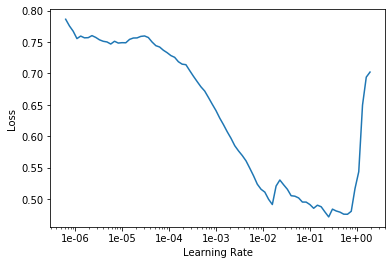

In [8]:
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(1, 2e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.270843,0.071399,0.979592,02:11


In [10]:
learn.save('first')

In [6]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4310 items)
x: TextList
xxbos xxmaj the xxmaj home xxmaj based xxmaj business of the xxup decade 
  $ 10 k plus checks in 30 xxunk xxmaj its a xxup fact ! 
  xxmaj join the next xxup big xxmaj internet xxmaj gold xxmaj rush today ! 
  http : / / xxunk / xxunk 
  xxrep 64 * 
  xxmaj top xxmaj sponsor xxmaj ad 
  xxrep 64 * 
 
  xxmaj if you spend any time online trying to wade through the xxunk of 
  internet hype and promises of riches , no doubt you will have noticed that 
  xxmaj xxunk are the current xxunk of the week these days . 
  xxmaj this is a xxmaj new xxmaj launched xxmaj xxunk ( xxmaj sept. 25 , 2004 ) only a week old , 
  with 6 very active members . 
  xxmaj get in early . 
  $ 5.00 xxup payments xxup with xxup no xxup advertising ! 
 
  xxmaj we do the work , you get paid ! 
 
  xxmaj earn xxmaj streams xxmaj of $ 5 
 
  .. xxmaj we xxmaj guarantee xxmaj it ! 
 
  xxmaj our " xxmaj we xxmaj do xxmaj the xxmaj work " x

In [8]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.186836,0.057105,0.981447,02:45


In [9]:
learn.save('second')

In [6]:
# same settings but with smaller bs as we freeze more layers
bs = 20
data_clas = load_data('datasets/', 'data_clas.pkl', bs=bs)
data_clas.show_batch()

learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=.5)
learn.load_encoder('fine_tubed_enc')

learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4310 items)
x: TextList
xxbos xxmaj the xxmaj home xxmaj based xxmaj business of the xxup decade 
  $ 10 k plus checks in 30 xxunk xxmaj its a xxup fact ! 
  xxmaj join the next xxup big xxmaj internet xxmaj gold xxmaj rush today ! 
  http : / / xxunk / xxunk 
  xxrep 64 * 
  xxmaj top xxmaj sponsor xxmaj ad 
  xxrep 64 * 
 
  xxmaj if you spend any time online trying to wade through the xxunk of 
  internet hype and promises of riches , no doubt you will have noticed that 
  xxmaj xxunk are the current xxunk of the week these days . 
  xxmaj this is a xxmaj new xxmaj launched xxmaj xxunk ( xxmaj sept. 25 , 2004 ) only a week old , 
  with 6 very active members . 
  xxmaj get in early . 
  $ 5.00 xxup payments xxup with xxup no xxup advertising ! 
 
  xxmaj we do the work , you get paid ! 
 
  xxmaj earn xxmaj streams xxmaj of $ 5 
 
  .. xxmaj we xxmaj guarantee xxmaj it ! 
 
  xxmaj our " xxmaj we xxmaj do xxmaj the xxmaj work " x

In [7]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.153994,0.036624,0.989796,03:20


In [8]:
learn.save('third')

In [3]:
# same settings but with smaller bs as we freeze more layers
bs = 8
data_clas = load_data('datasets/', 'data_clas.pkl', bs=bs)
data_clas.show_batch()

learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=.5)
learn.load_encoder('fine_tubed_enc')

learn.load('third')

text,target
"xxbos change your settings : http : / / blo.gs / xxunk \n \n here is your list of updated weblogs . \n \n xxmaj oct 04 , 2002 \n \n xxunk \n love-always.net \n http : / / love-always.net / \n xxmaj michael 's xxmaj cyber xxmaj journal \n http : / / xxunk / \n xxmaj jesus xxmaj christ \n",False
"xxbos \n xxmaj sent e - mail message \n \n xxmaj from : enenkio@webtv.net ( xxmaj robert � xxmaj moore ) xxmaj date : xxmaj thu , xxmaj sep 5 , 2002 , xxunk xxmaj to : xxunk xxmaj subject : xxup hawai`i & xxup enenkio xxup kingdoms xxup americans xxup shame ! \n xxmaj sent e - mail message \n xxmaj from : enenkio@webtv.net (",True
"xxbos i ca n't believe i actually read a laugh - out - loud funny profile of the \n * xxup fcc xxmaj commissioner * xxunk xxunk ! xxmaj so the following article comes \n recommended , a fine explanation of xxmaj michael xxmaj powell 's extraordinary \n xxunk . \n \n xxmaj on the other hand , i can also agree with xxmaj xxunk 's",False
xxbos xxup otc / 伊東様 \n お世話になっております 。 \n \n xxunk \n xxunk \n xxunk 。 \n xxunk for xxup xxunk \n xxunk 。 \n \n xxunk \n xxup xxunk \n xxunk \n xxunk 。 \n \n xxunk for xxunk \n xxunk 。 \n \n http : / / www.microsoft.com / japan / support / kb /,False
"xxbos > > xxmaj but it also identified as spam everything in my inbox that had any \n > > xxup mime structure or xxup html parts , and several messages in my saved ' zope \n > > geeks ' list that happened to be using xxup mime and / or xxup html . \n > \n > xxmaj do you know why ? xxmaj",False


RNNLearner(data=TextClasDataBunch;

Train: LabelList (4310 items)
x: TextList
xxbos xxmaj the xxmaj home xxmaj based xxmaj business of the xxup decade 
  $ 10 k plus checks in 30 xxunk xxmaj its a xxup fact ! 
  xxmaj join the next xxup big xxmaj internet xxmaj gold xxmaj rush today ! 
  http : / / xxunk / xxunk 
  xxrep 64 * 
  xxmaj top xxmaj sponsor xxmaj ad 
  xxrep 64 * 
 
  xxmaj if you spend any time online trying to wade through the xxunk of 
  internet hype and promises of riches , no doubt you will have noticed that 
  xxmaj xxunk are the current xxunk of the week these days . 
  xxmaj this is a xxmaj new xxmaj launched xxmaj xxunk ( xxmaj sept. 25 , 2004 ) only a week old , 
  with 6 very active members . 
  xxmaj get in early . 
  $ 5.00 xxup payments xxup with xxup no xxup advertising ! 
 
  xxmaj we do the work , you get paid ! 
 
  xxmaj earn xxmaj streams xxmaj of $ 5 
 
  .. xxmaj we xxmaj guarantee xxmaj it ! 
 
  xxmaj our " xxmaj we xxmaj do xxmaj the xxmaj work " x

In [4]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.175815,0.037099,0.989796,07:41
1,0.149219,0.034745,0.989796,09:06


In [5]:
learn.save('fourth')

In [7]:
learn.predict("Jeff, As we discussed, attached is a comprehensive list of the team and deals. As you know, Louise formally calls our team Asset Marketing. I tend to think that we play a number of roles including corporate development, CTG, deal structuring, and anything else that is required to get a deal done. In addition to the core team, I believe we also need to consider other issues related to asset sales including DealBench ('DB').  DB is a tremendous platform, that should be maintained.  It facilitates the sales process in so many ways, and would require very little to keep it alive.  Jon Hoff in our group can do almost anything related to DB and would probably require one engineer (not 100% of his time) to be available for DB to maintained.  In addition to our team, the development group run by Ben Jacoby has been selling development sites, and Chris Calger has a team out west that has had a lot of success.  These groups (or a subset thereof), I believe should be maintained for the assets that they hold today and potentially other sales as well.")

(Category False, tensor(0), tensor([0.8604, 0.1396]))

In [8]:
learn.predict("HERE'S GOOD NEWS There IS an alternative to MLM that WORKS, and works BIG! If you haven't yet abandoned your dreams, then you need to see this. Earning the kind of income you've dreamed about is easier than you think! With your permission, I'd like to send you a brief letter that will tell you WHY MLM doesn't work for most people and will then introduce you to something so new and refreshing that you'll wonder why you haven't heard of this before.")

(Category True, tensor(1), tensor([0.0013, 0.9987]))

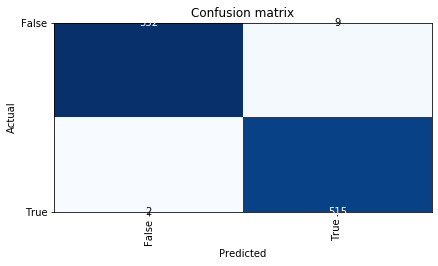

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.con